#                                      # FitBit CAPSTONE PROJECT

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

warnings.filterwarnings('ignore')

In [3]:
#pip install -U seaborn
#! pip install --upgrade matplotlib
#!pip install missingno

In [4]:
!pip install yellowbrick

In [5]:
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [6]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.expand_frame_repr', False)
pd.set_option("display.float_format", lambda x: "%.3f" %x)

# 1. Exploratory Data Analysis


In [7]:
exercise_minitues_records_ = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/FitBit_datasets/exercise_minitues_records.csv")
exercise_minitues_records_

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.000,6.060,0.550,1.880
1,1503960366,4/13/2016,776,217,19,21,0.000,4.710,0.690,1.570
2,1503960366,4/14/2016,1218,181,11,30,0.000,3.910,0.400,2.440
3,1503960366,4/15/2016,726,209,34,29,0.000,2.830,1.260,2.140
4,1503960366,4/16/2016,773,221,10,36,0.000,5.040,0.410,2.710
...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,1174,245,4,17,0.000,6.800,0.200,1.080
936,8877689391,5/9/2016,1131,217,19,73,0.050,6.240,0.800,11.100
937,8877689391,5/10/2016,1187,224,11,18,0.000,6.280,0.460,1.350
938,8877689391,5/11/2016,1127,213,12,88,0.000,5.890,0.410,13.220


In [8]:
exercise_minitues_records = exercise_minitues_records_.drop(["Id", "ActivityDay", "SedentaryActiveDistance","LightActiveDistance", "ModeratelyActiveDistance", "VeryActiveDistance" ], axis=1)
exercise_minitues_records

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes
0,728,328,13,25
1,776,217,19,21
2,1218,181,11,30
3,726,209,34,29
4,773,221,10,36
...,...,...,...,...
935,1174,245,4,17
936,1131,217,19,73
937,1187,224,11,18
938,1127,213,12,88


In [9]:
heartrate_ = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/FitBit_datasets/heartrate.csv", skiprows=range(1, 25), nrows=941)
heartrate_.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:24:40 AM,56
1,2022484408,4/12/2016 7:24:50 AM,58
2,2022484408,4/12/2016 7:25:05 AM,57
3,2022484408,4/12/2016 7:25:10 AM,58
4,2022484408,4/12/2016 7:25:15 AM,60


In [10]:
heartrate = heartrate_.drop(["Id", "Time"], axis=1)
heartrate.rename(columns={"Value": "heartrate"}, inplace=True)
heartrate

,heartrate
0,56
1,58
2,57
3,58
4,60
...,...
936,85
937,81
938,79
939,75


In [11]:
total_minutes_sleep_ = pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/FitBit_datasets/total_minutes_sleep.csv")
total_minutes_sleep_

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [12]:
total_minutes_sleep = total_minutes_sleep_.drop(["Id", "SleepDay", "TotalSleepRecords"], axis=1)
total_minutes_sleep

,TotalMinutesAsleep,TotalTimeInBed
0,327,346
1,384,407
2,412,442
3,340,367
4,700,712
...,...,...
408,343,360
409,503,527
410,415,423
411,516,545


In [13]:
total_steps_= pd.read_csv("C:/Users/esman/OneDrive/Masaüstü/FitBit_datasets/total_steps.csv")
total_steps_


,Id,ActivityDay,StepTotal
0,1503960366,4/12/2016,13162
1,1503960366,4/13/2016,10735
2,1503960366,4/14/2016,10460
3,1503960366,4/15/2016,9762
4,1503960366,4/16/2016,12669
...,...,...,...
935,8877689391,5/8/2016,10686
936,8877689391,5/9/2016,20226
937,8877689391,5/10/2016,10733
938,8877689391,5/11/2016,21420


In [14]:
total_steps = total_steps_.drop(["Id", "ActivityDay"], axis=1)
total_steps.head()

,StepTotal
0,13162
1,10735
2,10460
3,9762
4,12669


In [15]:
df_ = pd.concat([exercise_minitues_records, heartrate, total_minutes_sleep, total_steps], axis=1)
df = df_.copy()
df.head(10)

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000
4,773.000,221.000,10.000,36.000,60,700.000,712.000,12669.000
5,539.000,164.000,20.000,38.000,60,304.000,320.000,9705.000
6,1149.000,233.000,16.000,42.000,58,360.000,377.000,13019.000
7,775.000,264.000,31.000,50.000,57,325.000,364.000,15506.000
8,818.000,205.000,12.000,28.000,55,361.000,384.000,10544.000
9,838.000,211.000,8.000,19.000,54,430.000,449.000,9819.000


In [16]:
#Veriye genel bakış
def check_df(dataframe, head=5):
    print("################# SHAPE ####################")
    print(dataframe.shape)
    print("################# TYPES ####################")
    print(dataframe.dtypes)
    print("################# HEAD ####################")
    print(dataframe.head(head))
    print("################# TAİL ####################")
    print(dataframe.tail(head))
    print("################# NA ####################")
    print(dataframe.isnull().sum())
    print("################# QUANTİLES ####################")
    print(dataframe.describe([0, 0.05, 0.5, 0.95, 0.99, 1]).T)
check_df(df)

################# SHAPE ####################
(941, 8)
################# TYPES ####################
SedentaryMinutes        float64
LightlyActiveMinutes    float64
FairlyActiveMinutes     float64
VeryActiveMinutes       float64
heartrate                 int64
TotalMinutesAsleep      float64
TotalTimeInBed          float64
StepTotal               float64
dtype: object
################# HEAD ####################
   SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTimeInBed  StepTotal
0           728.000               328.000               13.000             25.000         56             327.000         346.000  13162.000
1           776.000               217.000               19.000             21.000         58             384.000         407.000  10735.000
2          1218.000               181.000               11.000             30.000         57             412.000         442.000  10460.000
3           726.000        

In [17]:
#Değişkenleri Yakalama
#cat_th<10 --> cat_cols
#car_th>20 --> car_th
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]               #önce kategorik değişkenler seçilir

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and    #numerik ama kategorikler seçilir.
                   dataframe[col].dtypes != "O"]

    # eğer bir kategorik değişkeni 20 den büyükse aynı zamanda tipi de kategorikse bu değişken kategorik değildir. kategorik gibi duruyorsun ama kardinel. yani ölçülebilirliği yok. eşsiz çok fazla sınıfın var.
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 941
Variables: 8
cat_cols: 0
num_cols: 8
cat_but_car: 0
num_but_cat: 0


In [18]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

count    940.000
mean     991.211
std      301.267
min        0.000
5%       536.700
10%      621.000
20%      707.800
30%      757.000
40%      852.600
50%     1057.500
60%     1122.000
70%     1191.300
80%     1272.600
90%     1410.300
95%     1440.000
99%     1440.000
max     1440.000
Name: SedentaryMinutes, dtype: float64


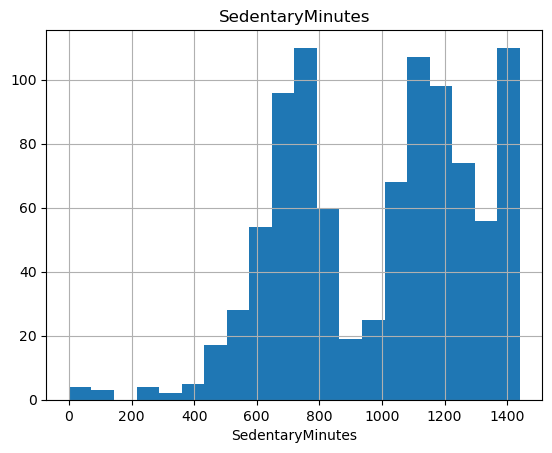

count   940.000
mean    192.813
std     109.175
min       0.000
5%        0.000
10%       3.900
20%     103.600
30%     142.700
40%     171.600
50%     199.000
60%     225.000
70%     250.000
80%     283.000
90%     330.000
95%     369.050
99%     436.270
max     518.000
Name: LightlyActiveMinutes, dtype: float64


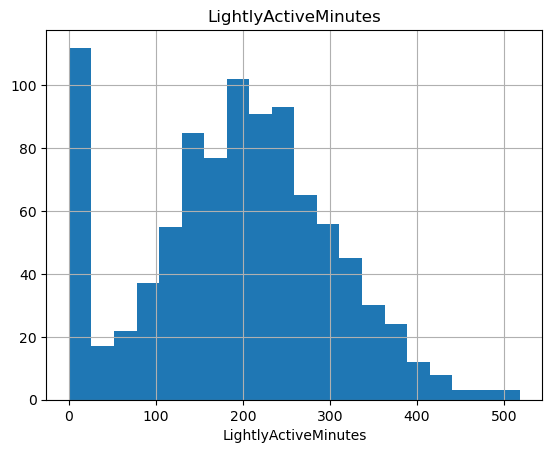

count   940.000
mean     13.565
std      19.987
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%       6.000
60%      10.000
70%      16.000
80%      23.000
90%      38.000
95%      51.000
99%      95.000
max     143.000
Name: FairlyActiveMinutes, dtype: float64


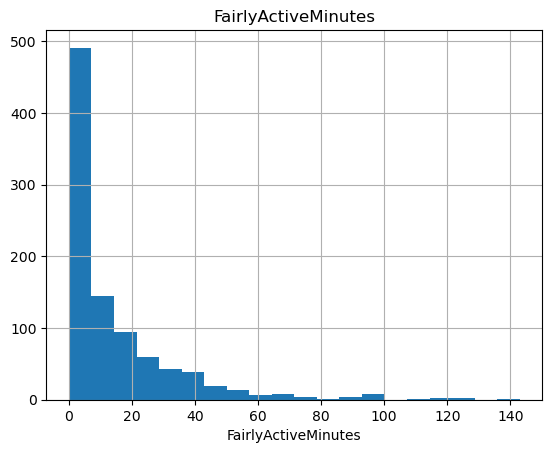

count   940.000
mean     21.165
std      32.845
min       0.000
5%        0.000
10%       0.000
20%       0.000
30%       0.000
40%       0.000
50%       4.000
60%      12.000
70%      24.000
80%      41.000
90%      66.000
95%      93.050
99%     125.000
max     210.000
Name: VeryActiveMinutes, dtype: float64


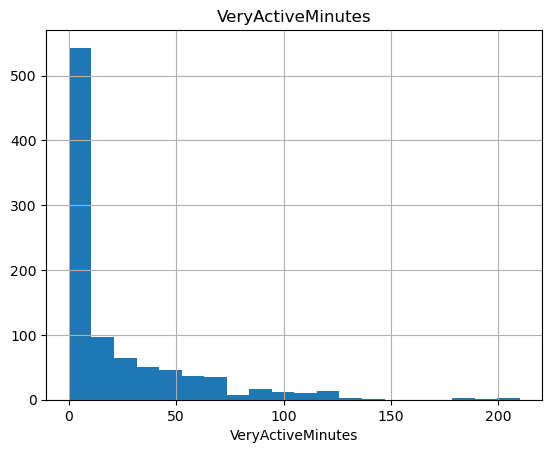

count   941.000
mean     71.798
std      14.324
min      52.000
5%       56.000
10%      57.000
20%      59.000
30%      60.000
40%      62.000
50%      66.000
60%      76.000
70%      81.000
80%      85.000
90%      92.000
95%     100.000
99%     106.000
max     112.000
Name: heartrate, dtype: float64


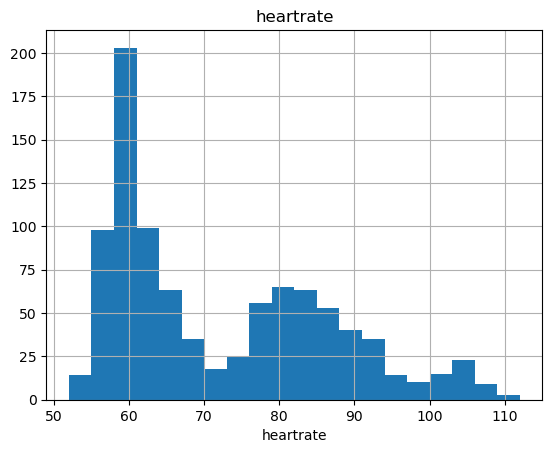

count   413.000
mean    419.467
std     118.345
min      58.000
5%      169.000
10%     283.400
20%     342.400
30%     381.600
40%     410.600
50%     433.000
60%     452.000
70%     475.400
80%     506.600
90%     534.600
95%     590.400
99%     699.040
max     796.000
Name: TotalMinutesAsleep, dtype: float64


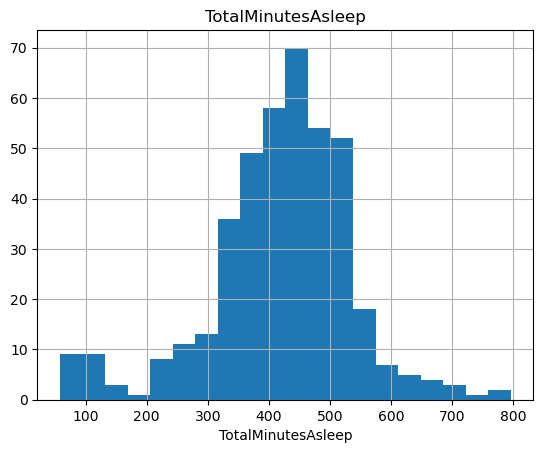

count   413.000
mean    458.639
std     127.102
min      61.000
5%      220.400
10%     338.800
20%     386.000
30%     417.000
40%     445.800
50%     463.000
60%     490.200
70%     510.000
80%     543.000
90%     568.000
95%     629.200
99%     834.840
max     961.000
Name: TotalTimeInBed, dtype: float64


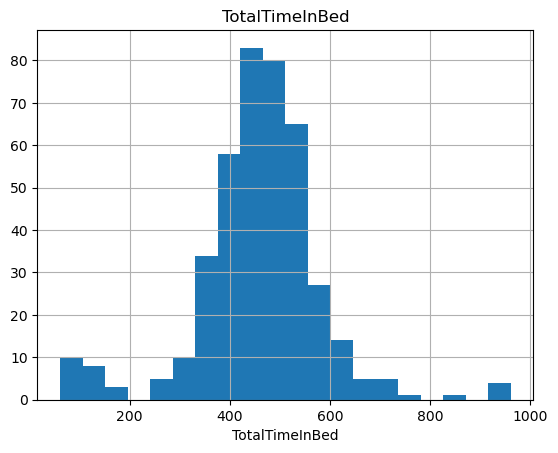

count     940.000
mean     7637.911
std      5087.151
min         0.000
5%          0.000
10%       253.000
20%      2991.800
30%      4690.700
40%      6116.600
50%      7405.500
60%      8865.400
70%     10165.600
80%     11599.000
90%     13959.600
95%     15485.100
99%     21909.390
max     36019.000
Name: StepTotal, dtype: float64


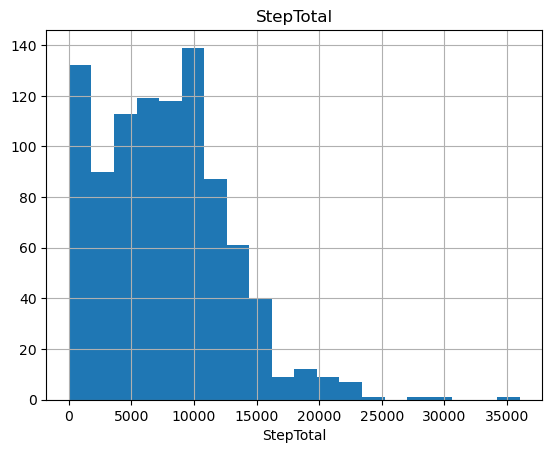

In [19]:
#numerik değişken analizi
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)

# 2. Data Preprocessing & Feature Engineering


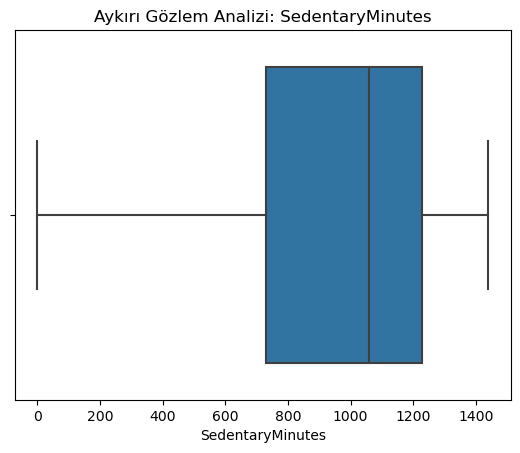

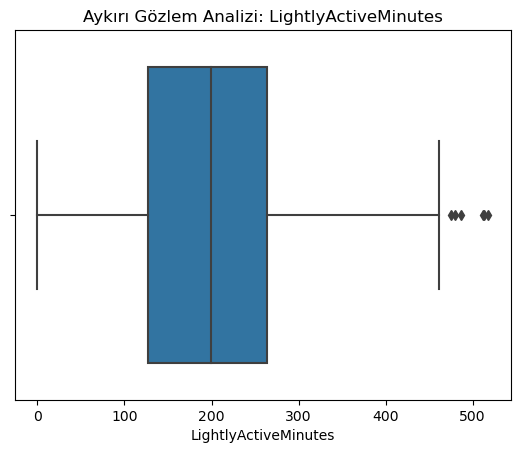

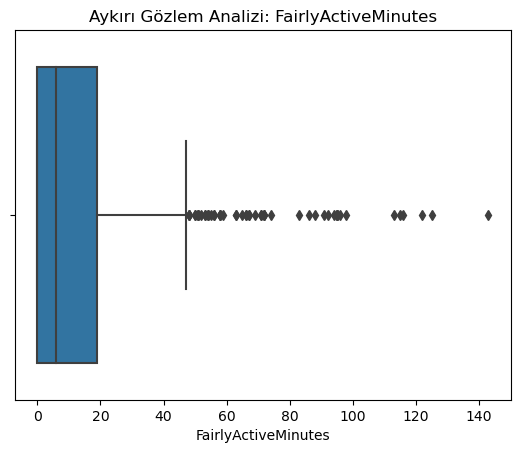

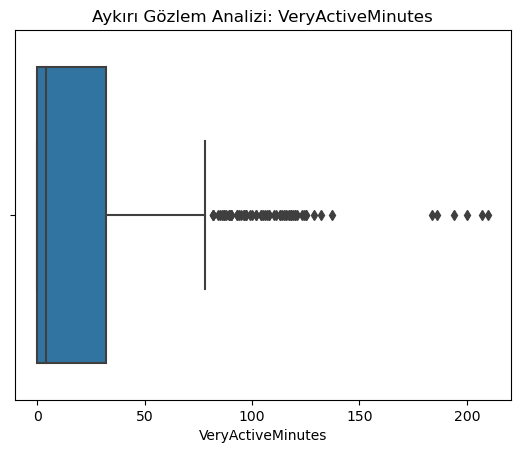

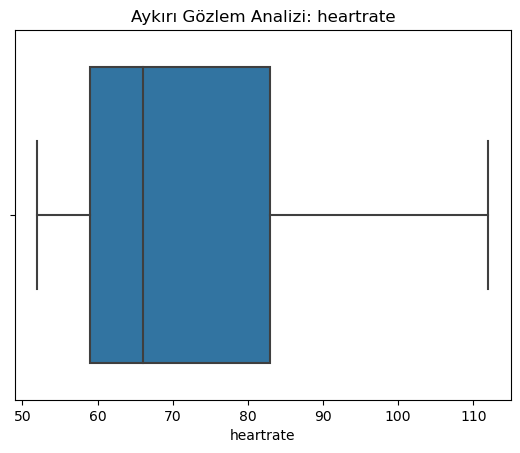

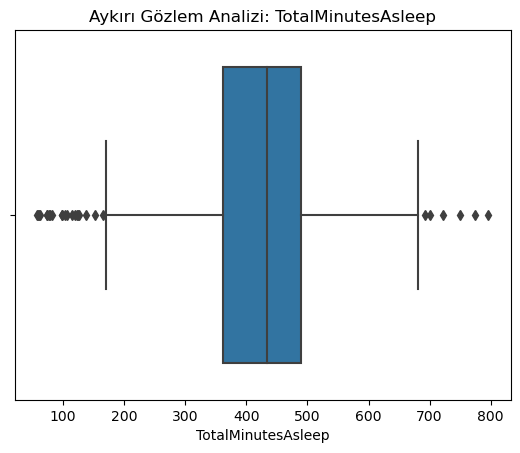

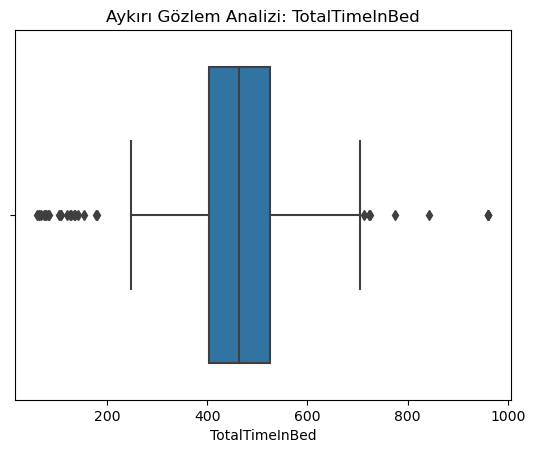

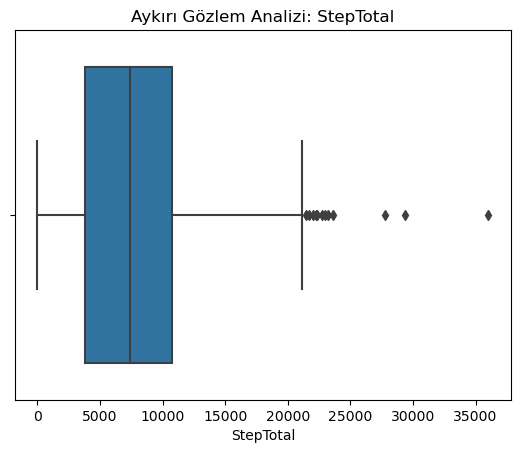

In [20]:
#Aykırı gözlem analizi
def outlier_analysis(df):
    columns = df.columns
    for column in columns:
        sns.boxplot(x=df[column])
        plt.title(f"Aykırı Gözlem Analizi: {column}")
        plt.show()

outlier_analysis(df)

In [21]:
def outlier_thresholds(dataframe,col_name, q1=0.25, q3=0.75):
  quartile1 = dataframe[col_name].quantile( q1 )
  quartile3 = dataframe[col_name].quantile( q3 )
  interquantile_range = quartile3 - quartile1
  up_limit = quartile3 + 1.5 * interquantile_range
  low_limit = quartile1 - 1.5 * interquantile_range
  return low_limit, up_limit

In [22]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True  #aykırı değer varsa true döner.
    else:
        return False 

In [23]:
for col in num_cols:
    print(col, check_outlier(df, col))

SedentaryMinutes False
LightlyActiveMinutes True
FairlyActiveMinutes True
VeryActiveMinutes True
heartrate False
TotalMinutesAsleep True
TotalTimeInBed True
StepTotal True


In [24]:
#aykırı değerlerin kendilerine erişmek için:
def grab_outliers(dataframe, col_name, index=False):
    low, up = outlier_thresholds(dataframe, col_name)

    if dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].shape[0] > 10:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].head())
    else:
        print(dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))])

    if index:
        outlier_index = dataframe[((dataframe[col_name] < low) | (dataframe[col_name] > up))].index
        return outlier_index
#grab_outliers(df, "FairlyActiveMinutes")

In [25]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

df

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000
4,773.000,221.000,10.000,36.000,60,683.500,710.500,12669.000
...,...,...,...,...,...,...,...,...
936,1131.000,217.000,19.000,73.000,85,NaN,NaN,20226.000
937,1187.000,224.000,11.000,18.000,81,NaN,NaN,10733.000
938,1127.000,213.000,12.000,80.000,79,NaN,NaN,21132.875
939,770.000,137.000,1.000,23.000,75,NaN,NaN,8064.000


In [26]:
for col in num_cols:
    print(col, check_outlier(df, col))

SedentaryMinutes False
LightlyActiveMinutes False
FairlyActiveMinutes False
VeryActiveMinutes False
heartrate False
TotalMinutesAsleep False
TotalTimeInBed False
StepTotal False


In [27]:
df.describe([0.01, 0.05, 0.75, 0.90, 0.99]).T

,count,mean,std,min,1%,5%,50%,75%,90%,99%,max
SedentaryMinutes,940.000,991.211,301.267,0.000,247.240,536.700,1057.500,1229.500,1410.300,1440.000,1440.000
LightlyActiveMinutes,940.000,192.634,108.688,0.000,0.000,0.000,199.000,264.000,330.000,436.270,469.500
FairlyActiveMinutes,940.000,12.022,14.826,0.000,0.000,0.000,6.000,19.000,38.000,47.500,47.500
VeryActiveMinutes,940.000,18.905,25.884,0.000,0.000,0.000,4.000,32.000,66.000,80.000,80.000
heartrate,941.000,71.798,14.324,52.000,54.000,56.000,66.000,83.000,92.000,106.000,112.000
TotalMinutesAsleep,413.000,422.105,107.147,167.500,167.500,169.600,433.000,490.000,534.600,683.500,683.500
TotalTimeInBed,413.000,461.266,102.991,218.500,218.500,236.200,463.000,526.000,568.000,710.500,710.500
StepTotal,940.000,7593.395,4929.347,0.000,0.000,0.000,7405.500,10727.000,13959.600,21132.875,21132.875


In [28]:
# Missing Values (Eksik Değerler)
df.isnull().values.any()

True

In [29]:
df.notnull().sum()


SedentaryMinutes        940
LightlyActiveMinutes    940
FairlyActiveMinutes     940
VeryActiveMinutes       940
heartrate               941
TotalMinutesAsleep      413
TotalTimeInBed          413
StepTotal               940
dtype: int64

In [30]:
df.isnull().sum()

SedentaryMinutes          1
LightlyActiveMinutes      1
FairlyActiveMinutes       1
VeryActiveMinutes         1
heartrate                 0
TotalMinutesAsleep      528
TotalTimeInBed          528
StepTotal                 1
dtype: int64

In [31]:
#equal=o // hangi değişkende kaç tane 0 var.
df.eq(0).sum()

SedentaryMinutes          1
LightlyActiveMinutes     84
FairlyActiveMinutes     384
VeryActiveMinutes       409
heartrate                 0
TotalMinutesAsleep        0
TotalTimeInBed            0
StepTotal                77
dtype: int64

In [32]:
#na_cols=eksik değerlerin olduğu kolonlar
na_cols = [col for col in df.columns if df[col].isnull().sum() > 0]
na_cols

['SedentaryMinutes',
 'LightlyActiveMinutes',
 'FairlyActiveMinutes',
 'VeryActiveMinutes',
 'TotalMinutesAsleep',
 'TotalTimeInBed',
 'StepTotal']

In [33]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    #eksik değer sayısı için;
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    #eksik değer oranı için;
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    #axis=1 ,sütunlara göre birleştirme işlemi yapmak istiyorum.
    #np.round(..) virgülden sonraki basamakla ilgili bir ayarlama yapılmış.
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


missing_values_table(df)

                      n_miss  ratio
TotalMinutesAsleep       528 56.110
TotalTimeInBed           528 56.110
SedentaryMinutes           1  0.110
LightlyActiveMinutes       1  0.110
FairlyActiveMinutes        1  0.110
VeryActiveMinutes          1  0.110
StepTotal                  1  0.110


In [34]:
missing_values_table(df, True)

                      n_miss  ratio
TotalMinutesAsleep       528 56.110
TotalTimeInBed           528 56.110
SedentaryMinutes           1  0.110
LightlyActiveMinutes       1  0.110
FairlyActiveMinutes        1  0.110
VeryActiveMinutes          1  0.110
StepTotal                  1  0.110


['SedentaryMinutes',
 'LightlyActiveMinutes',
 'FairlyActiveMinutes',
 'VeryActiveMinutes',
 'TotalMinutesAsleep',
 'TotalTimeInBed',
 'StepTotal']

In [35]:
#Eksik Değer Problemini Çözme

df.dropna(inplace=True)
df.dropna(axis=1, inplace=True)


In [36]:
df

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000
4,773.000,221.000,10.000,36.000,60,683.500,710.500,12669.000
...,...,...,...,...,...,...,...,...
408,490.000,374.000,14.000,2.000,62,343.000,360.000,10378.000
409,555.000,329.000,12.000,3.000,62,503.000,527.000,9487.000
410,574.000,311.000,18.000,3.000,62,415.000,423.000,9129.000
411,0.000,2.000,0.000,0.000,60,516.000,545.000,17.000


In [37]:
df.isnull().sum()


SedentaryMinutes        0
LightlyActiveMinutes    0
FairlyActiveMinutes     0
VeryActiveMinutes       0
heartrate               0
TotalMinutesAsleep      0
TotalTimeInBed          0
StepTotal               0
dtype: int64

In [38]:
df.isnull().values.any()

False

In [39]:
df.eq(0).sum()


SedentaryMinutes          1
LightlyActiveMinutes     42
FairlyActiveMinutes     205
VeryActiveMinutes       221
heartrate                 0
TotalMinutesAsleep        0
TotalTimeInBed            0
StepTotal                40
dtype: int64

# Özellik Ölçeklendirme

In [40]:
# Yeni değişkenlerin hesaplanması
df['active_life'] = df.loc[:, "FairlyActiveMinutes"] + df.loc[:, "VeryActiveMinutes"] 


In [41]:
df['active_life']

0     38.000
1     40.000
2     41.000
3     63.000
4     46.000
       ...  
408   16.000
409   15.000
410   21.000
411    0.000
412    0.000
Name: active_life, Length: 413, dtype: float64

In [42]:
df["sleep_quality"] = df.loc[:, "TotalMinutesAsleep"] / df.loc[:, "TotalTimeInBed"]

In [43]:
df["active_total_time"] = df.loc[:, "LightlyActiveMinutes"] + df.loc[:, "VeryActiveMinutes"] + df.loc[:, "FairlyActiveMinutes"] 
#toplamegzersizdakikası

In [44]:
#average_movement_speed =  adım/dk
df["average_movement_speed"] = df.loc[:, "StepTotal"] / df.loc[:, "active_total_time"]


df["step_minutes"] = (1/ df.loc[:, "average_movement_speed"]) * (df.loc[:, "StepTotal"])

In [45]:
df

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal,active_life,sleep_quality,active_total_time,average_movement_speed
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000,38.000,0.945,366.000,35.962
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000,40.000,0.943,257.000,41.770
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000,41.000,0.932,222.000,47.117
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000,63.000,0.926,272.000,35.890
4,773.000,221.000,10.000,36.000,60,683.500,710.500,12669.000,46.000,0.962,267.000,47.449
...,...,...,...,...,...,...,...,...,...,...,...,...
408,490.000,374.000,14.000,2.000,62,343.000,360.000,10378.000,16.000,0.953,390.000,26.610
409,555.000,329.000,12.000,3.000,62,503.000,527.000,9487.000,15.000,0.954,344.000,27.578
410,574.000,311.000,18.000,3.000,62,415.000,423.000,9129.000,21.000,0.981,332.000,27.497
411,0.000,2.000,0.000,0.000,60,516.000,545.000,17.000,0.000,0.947,2.000,8.500


In [46]:
df.shape

(413, 12)

In [47]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 413
Variables: 12
cat_cols: 0
num_cols: 12
cat_but_car: 0
num_but_cat: 0


In [48]:
def segment_lifestyle(StepTotal, active_life, SedentaryMinutes):
    for col in df.columns:
        if (StepTotal > 15000 | active_life > 40):
            return "Very_Active_LifeStyle"
        if (StepTotal < 15000 & StepTotal > 10000) | (active_life >20 & active_life < 40):
            return "Active_LifeStyle"
        if StepTotal < 10000 | active_life < 20 | SedentaryMinutes > 450:
            return "Low_Active_LifeStyle"

In [49]:
segment_lifestyle(198, 65, 387)

'Active_LifeStyle'

In [50]:
def segment_lifestyle(row):
    if (row['StepTotal'] > 15000 or row['active_life'] > 40):
        return "Very_Active_LifeStyle"
    if (row['StepTotal'] < 15000 and row['StepTotal'] > 10000) or (row['active_life'] >20 and row['active_life'] < 40):
        return "Active_LifeStyle"
    if row['StepTotal'] < 10000 or row['active_life'] < 20 or row['SedentaryMinutes'] > 450:
        return "Low_Active_LifeStyle"
        
df['segment_lifestyle'] = df.apply(lambda row: segment_lifestyle(row), axis=1)
df

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal,active_life,sleep_quality,active_total_time,average_movement_speed,segment_lifestyle
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000,38.000,0.945,366.000,35.962,Active_LifeStyle
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000,40.000,0.943,257.000,41.770,Active_LifeStyle
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000,41.000,0.932,222.000,47.117,Very_Active_LifeStyle
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000,63.000,0.926,272.000,35.890,Very_Active_LifeStyle
4,773.000,221.000,10.000,36.000,60,683.500,710.500,12669.000,46.000,0.962,267.000,47.449,Very_Active_LifeStyle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,490.000,374.000,14.000,2.000,62,343.000,360.000,10378.000,16.000,0.953,390.000,26.610,Active_LifeStyle
409,555.000,329.000,12.000,3.000,62,503.000,527.000,9487.000,15.000,0.954,344.000,27.578,Low_Active_LifeStyle
410,574.000,311.000,18.000,3.000,62,415.000,423.000,9129.000,21.000,0.981,332.000,27.497,Active_LifeStyle
411,0.000,2.000,0.000,0.000,60,516.000,545.000,17.000,0.000,0.947,2.000,8.500,Low_Active_LifeStyle


In [51]:
def segment_sleepquality(sleep_quality):
    for col in df.columns:
        if sleep_quality >= 0.899:
            return "High Sleep Quality"
        if sleep_quality >= 0.800 and sleep_quality < 0.899:
            return "Normal Sleep Quality"
        if sleep_quality <= 0.890:
            return "Low Sleep Quality"

In [52]:
segment_sleepquality(0.800)

'Normal Sleep Quality'

In [53]:
def segment_sleepquality(row):
    if(row["sleep_quality"] >= 0.900):
        return "High Sleep Quality"
    if(row["sleep_quality"] >= 0.800 and row["sleep_quality"] < 0.899):
        return "Normal Sleep Quality"
    if(row["sleep_quality"] <= 0.899):
        return "Low Sleep Quality"
        
df['segment_sleepquality'] = df.apply(lambda row: segment_sleepquality(row), axis=1)
df

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal,active_life,sleep_quality,active_total_time,average_movement_speed,segment_lifestyle,segment_sleepquality
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000,38.000,0.945,366.000,35.962,Active_LifeStyle,High Sleep Quality
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000,40.000,0.943,257.000,41.770,Active_LifeStyle,High Sleep Quality
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000,41.000,0.932,222.000,47.117,Very_Active_LifeStyle,High Sleep Quality
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000,63.000,0.926,272.000,35.890,Very_Active_LifeStyle,High Sleep Quality
4,773.000,221.000,10.000,36.000,60,683.500,710.500,12669.000,46.000,0.962,267.000,47.449,Very_Active_LifeStyle,High Sleep Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,490.000,374.000,14.000,2.000,62,343.000,360.000,10378.000,16.000,0.953,390.000,26.610,Active_LifeStyle,High Sleep Quality
409,555.000,329.000,12.000,3.000,62,503.000,527.000,9487.000,15.000,0.954,344.000,27.578,Low_Active_LifeStyle,High Sleep Quality
410,574.000,311.000,18.000,3.000,62,415.000,423.000,9129.000,21.000,0.981,332.000,27.497,Active_LifeStyle,High Sleep Quality
411,0.000,2.000,0.000,0.000,60,516.000,545.000,17.000,0.000,0.947,2.000,8.500,Low_Active_LifeStyle,High Sleep Quality


In [54]:
def segment_heartrate(heartrate):
    for col in df.columns:
        if heartrate  >= 100:
            return "High Heartrate"
        if heartrate >= 60 and heartrate < 100:
            return "Normal Heartrate"
        if sleep_quality < 60:
            return "Low Heartrate"

In [55]:
segment_heartrate(90)

'Normal Heartrate'

In [56]:
def segment_heartrate(row):
    if(row["heartrate"] >= 100):
        return "High Heartrate"
    if(row["heartrate"] >= 60 and row["heartrate"] < 100):
        return "Normal Heartrate"
    if(row["sleep_quality"] < 60):
        return "Low Heartrate"
        
df['segment_heartrate'] = df.apply(lambda row: segment_heartrate(row), axis=1)
df

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal,active_life,sleep_quality,active_total_time,average_movement_speed,segment_lifestyle,segment_sleepquality,segment_heartrate
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000,38.000,0.945,366.000,35.962,Active_LifeStyle,High Sleep Quality,Low Heartrate
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000,40.000,0.943,257.000,41.770,Active_LifeStyle,High Sleep Quality,Low Heartrate
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000,41.000,0.932,222.000,47.117,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000,63.000,0.926,272.000,35.890,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate
4,773.000,221.000,10.000,36.000,60,683.500,710.500,12669.000,46.000,0.962,267.000,47.449,Very_Active_LifeStyle,High Sleep Quality,Normal Heartrate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,490.000,374.000,14.000,2.000,62,343.000,360.000,10378.000,16.000,0.953,390.000,26.610,Active_LifeStyle,High Sleep Quality,Normal Heartrate
409,555.000,329.000,12.000,3.000,62,503.000,527.000,9487.000,15.000,0.954,344.000,27.578,Low_Active_LifeStyle,High Sleep Quality,Normal Heartrate
410,574.000,311.000,18.000,3.000,62,415.000,423.000,9129.000,21.000,0.981,332.000,27.497,Active_LifeStyle,High Sleep Quality,Normal Heartrate
411,0.000,2.000,0.000,0.000,60,516.000,545.000,17.000,0.000,0.947,2.000,8.500,Low_Active_LifeStyle,High Sleep Quality,Normal Heartrate


In [57]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 413
Variables: 15
cat_cols: 3
num_cols: 12
cat_but_car: 0
num_but_cat: 0


In [58]:
cat_cols

['segment_lifestyle', 'segment_sleepquality', 'segment_heartrate']

In [59]:
df["segment_heartrate_encoded"] = df["segment_heartrate"].replace({"Low Heartrate": 1, 'Normal Heartrate': 2, 'High Heartrate':3})
df.head(5)

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal,active_life,sleep_quality,active_total_time,average_movement_speed,segment_lifestyle,segment_sleepquality,segment_heartrate,segment_heartrate_encoded
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000,38.000,0.945,366.000,35.962,Active_LifeStyle,High Sleep Quality,Low Heartrate,1
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000,40.000,0.943,257.000,41.770,Active_LifeStyle,High Sleep Quality,Low Heartrate,1
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000,41.000,0.932,222.000,47.117,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate,1
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000,63.000,0.926,272.000,35.890,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate,1
4,773.000,221.000,10.000,36.000,60,683.500,710.500,12669.000,46.000,0.962,267.000,47.449,Very_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2


In [60]:
#Eksik Değer Problemini Çözme

df.dropna(inplace=True)
df.dropna(axis=1, inplace=True)

In [61]:
cat_cols, num_cols, cat_but_car = grab_col_names(df, cat_th=5, car_th=20)


Observations: 370
Variables: 16
cat_cols: 4
num_cols: 12
cat_but_car: 0
num_but_cat: 1


In [62]:
for col in cat_cols:
    cat_summary(df, col)

                       segment_lifestyle  Ratio
Low_Active_LifeStyle                 204 55.135
Very_Active_LifeStyle                106 28.649
Active_LifeStyle                      60 16.216
##########################################
                      segment_sleepquality  Ratio
High Sleep Quality                     285 77.027
Low Sleep Quality                       43 11.622
Normal Sleep Quality                    42 11.351
##########################################
                  segment_heartrate  Ratio
Normal Heartrate                298 80.541
High Heartrate                   44 11.892
Low Heartrate                    28  7.568
##########################################
   segment_heartrate_encoded  Ratio
2                        298 80.541
3                         44 11.892
1                         28  7.568
##########################################


In [63]:
df['segment_lifestyle_encoded'] = df['segment_lifestyle'].replace({"Low_Active_LifeStyle": 1, 'Active_LifeStyle': 2, 'Very_Active_LifeStyle':3})


In [64]:
df['segment_sleepquality_encoded'] = df['segment_sleepquality'].replace({"Low Sleep Quality": 1, 'Normal Sleep Quality': 2, 'High Sleep Quality':3})
df

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal,active_life,sleep_quality,active_total_time,average_movement_speed,segment_lifestyle,segment_sleepquality,segment_heartrate,segment_heartrate_encoded,segment_lifestyle_encoded,segment_sleepquality_encoded
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000,38.000,0.945,366.000,35.962,Active_LifeStyle,High Sleep Quality,Low Heartrate,1,2,3
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000,40.000,0.943,257.000,41.770,Active_LifeStyle,High Sleep Quality,Low Heartrate,1,2,3
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000,41.000,0.932,222.000,47.117,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate,1,3,3
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000,63.000,0.926,272.000,35.890,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate,1,3,3
4,773.000,221.000,10.000,36.000,60,683.500,710.500,12669.000,46.000,0.962,267.000,47.449,Very_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,490.000,374.000,14.000,2.000,62,343.000,360.000,10378.000,16.000,0.953,390.000,26.610,Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,2,3
409,555.000,329.000,12.000,3.000,62,503.000,527.000,9487.000,15.000,0.954,344.000,27.578,Low_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,1,3
410,574.000,311.000,18.000,3.000,62,415.000,423.000,9129.000,21.000,0.981,332.000,27.497,Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,2,3
411,0.000,2.000,0.000,0.000,60,516.000,545.000,17.000,0.000,0.947,2.000,8.500,Low_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,1,3


In [65]:
df.isnull().sum()

SedentaryMinutes                0
LightlyActiveMinutes            0
FairlyActiveMinutes             0
VeryActiveMinutes               0
heartrate                       0
TotalMinutesAsleep              0
TotalTimeInBed                  0
StepTotal                       0
active_life                     0
sleep_quality                   0
active_total_time               0
average_movement_speed          0
segment_lifestyle               0
segment_sleepquality            0
segment_heartrate               0
segment_heartrate_encoded       0
segment_lifestyle_encoded       0
segment_sleepquality_encoded    0
dtype: int64

In [66]:
df.eq(0).sum()

SedentaryMinutes                  1
LightlyActiveMinutes              2
FairlyActiveMinutes             164
VeryActiveMinutes               179
heartrate                         0
TotalMinutesAsleep                0
TotalTimeInBed                    0
StepTotal                         0
active_life                     159
sleep_quality                     0
active_total_time                 2
average_movement_speed            0
segment_lifestyle                 0
segment_sleepquality              0
segment_heartrate                 0
segment_heartrate_encoded         0
segment_lifestyle_encoded         0
segment_sleepquality_encoded      0
dtype: int64

In [67]:
df["segment_sleepquality_encoded"] = df["segment_sleepquality_encoded"].astype(int)

In [68]:
df

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal,active_life,sleep_quality,active_total_time,average_movement_speed,segment_lifestyle,segment_sleepquality,segment_heartrate,segment_heartrate_encoded,segment_lifestyle_encoded,segment_sleepquality_encoded
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000,38.000,0.945,366.000,35.962,Active_LifeStyle,High Sleep Quality,Low Heartrate,1,2,3
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000,40.000,0.943,257.000,41.770,Active_LifeStyle,High Sleep Quality,Low Heartrate,1,2,3
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000,41.000,0.932,222.000,47.117,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate,1,3,3
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000,63.000,0.926,272.000,35.890,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate,1,3,3
4,773.000,221.000,10.000,36.000,60,683.500,710.500,12669.000,46.000,0.962,267.000,47.449,Very_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,490.000,374.000,14.000,2.000,62,343.000,360.000,10378.000,16.000,0.953,390.000,26.610,Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,2,3
409,555.000,329.000,12.000,3.000,62,503.000,527.000,9487.000,15.000,0.954,344.000,27.578,Low_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,1,3
410,574.000,311.000,18.000,3.000,62,415.000,423.000,9129.000,21.000,0.981,332.000,27.497,Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,2,3
411,0.000,2.000,0.000,0.000,60,516.000,545.000,17.000,0.000,0.947,2.000,8.500,Low_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,1,3


In [69]:
print(len(df))

370


# RECOMMENDATİON
-  LİFESTYLE RECOMMENDATİON
-  SLEEP QUALİTY RECOMMENDATİON

In [70]:
# LİFESTYLE RECOMMENDATİON

In [71]:
def segment_lifestyle(row):
    if (row['StepTotal'] > 15000 or row['active_life'] > 40):
        return "Very_Active_LifeStyle"
    if (row['StepTotal'] < 15000 and row['StepTotal'] > 10000) or (row['active_life'] >20 and row['active_life'] < 40):
        return "Active_LifeStyle"
    if row['StepTotal'] < 10000 or row['active_life'] < 20 or row['SedentaryMinutes'] > 450:
        return "Low_Active_LifeStyle"
        
df['segment_lifestyle'] = df.apply(lambda row: segment_lifestyle(row), axis=1)

In [72]:
def life_style_recommendation(segment_lifestyle):
    if segment_lifestyle == "Very_Active_LifeStyle":
        print("YOU'RE DOING GREAT!")
        print("Your code for 2 months of free membership at FitBit Gyms --> Your Code: Free_2Months")
        print("Code for your purchases at fitbit.com/sportsmarket and fitbit.com/sportsproduct --> Your Code: FitBit_Sports35%")
    elif segment_lifestyle == "Active_LifeStyle":
        print("YOU'RE DOING GREAT!")
        print("Your code for 2 months of free membership at FitBit Gyms --> Your Code: Free_2Months")
        print("Code for your purchases at fitbit.com/sportsmarket and fitbit.com/sportsproduct --> Your Code: FitBit_Sports_35%")
    else:
        print("IT'S TIME TO MOVE!")
        print("Being inactive for such a long time poses a significant risk to your health.")
        print("Start moving by doing the exercise routine in the video provided here every day: https://www.youtube.com/watch?v=DYuw4f1c4xs")
        print("It's time to get active! How about having a personal fitness coach always by your side?")
        print("Visit Fitbit.com/coaches page, choose a coach that you think is suitable for you, and "\
              "get a chance to experience 2 months of free coaching. Your code: Coach_2Months_Free")


In [73]:
def segment_lifestyle_recommendation(step_total, active_life, sedentary_minutes):
    segment = segment_lifestyle({'StepTotal': step_total, 'active_life': active_life, 'SedentaryMinutes': sedentary_minutes})
    life_style_recommendation(segment)

In [74]:
segment_lifestyle_recommendation(198, 65, 387)


YOU'RE DOING GREAT!
Your code for 2 months of free membership at FitBit Gyms --> Your Code: Free_2Months
Code for your purchases at fitbit.com/sportsmarket and fitbit.com/sportsproduct --> Your Code: FitBit_Sports35%


In [75]:
# SLEEP QUALİTY RECOMMENDATİON

In [76]:
# Kullanıcıdan girdi al
TotalMinutesAsleep = int(input("TotalMinutesAsleep: "))
TotalTimeInBed = int(input("TotalTimeInBed: "))

TotalMinutesAsleep: 45
TotalTimeInBed: 678


In [77]:
# Sleep quality hesapla
def calculate_sleep_quality(minutes_asleep, time_in_bed):
    if time_in_bed == 0:
        return 0
    return minutes_asleep / time_in_bed
sleep_quality = calculate_sleep_quality(TotalMinutesAsleep, TotalTimeInBed)


In [78]:
def segment_sleepquality(row):
    if row >= 0.900:
        return "High Sleep Quality"
    elif row >= 0.800 and row < 0.899:
        return "Normal Sleep Quality"
    else:
        return "Low Sleep Quality"

In [79]:
def sleep_quality_recommendation(segment_sleepquality):
    if segment_sleepquality == "High Sleep Quality":
        print("GREAT")
        print("• Stick to your routine")
        print("• Share your bed and pillow with fitbit.com/community and earn 15% discount.")
    elif segment_sleepquality == "Normal Sleep Quality":
        print("YOU ARE FINE!")
        print("• You can review your bed and pillow choices to further improve your sleep quality. You can visit fitbit.com/bedding for this. You will receive a 20% discount on your purchases made through this site --> Code: bedding20")
        print("• Exercise regularly. Regular exercise can help improve your sleep quality. You can seek help from a professional coach for regular exercise and nutrition. Visit fitbit.com/coach to choose the coach that suits you best and get a one-month free trial --> Code: 1Month_FreeCoach")
        print("• Factors such as stress can affect your sleep quality. Contact us to benefit from an expert in this area. +901234567890")
    else:
        print("IT'S TIME TO MOVE!")
        print("• Your sleep quality is very low, and this will have a negative impact on your daily life. If you have serious sleep problems, consult a doctor immediately.")
        print("• Establish regular sleep hours for yourself. Try to sleep and wake up at the same time every day.")
        print("• You can meditate before sleeping.")
        print("• Focus on regular exercise and nutrition. You can get support from a professional coach for this. I will give you a 95% discount on coaches on FitBit.com/coach that you can choose from. Don't forget to visit the 'fitbit.com/coach' page to create your first session. --> Code: Coach_Discount95")
        print("• Visit fitbit.com/bedding for a quality sleep. Choose the most suitable bed, pillow, etc. for you. You can also ask for help from our virtual assistant. You will receive a 75% discount on all your purchases --> Code: quality_sleep75")


In [80]:

# Sleep quality segmentini hesaplayın
segment = segment_sleepquality(sleep_quality)

In [81]:
# Recommendation'ı görüntüleyin
sleep_quality_recommendation(segment)

IT'S TIME TO MOVE!
• Your sleep quality is very low, and this will have a negative impact on your daily life. If you have serious sleep problems, consult a doctor immediately.
• Establish regular sleep hours for yourself. Try to sleep and wake up at the same time every day.
• You can meditate before sleeping.
• Focus on regular exercise and nutrition. You can get support from a professional coach for this. I will give you a 95% discount on coaches on FitBit.com/coach that you can choose from. Don't forget to visit the 'fitbit.com/coach' page to create your first session. --> Code: Coach_Discount95
• Visit fitbit.com/bedding for a quality sleep. Choose the most suitable bed, pillow, etc. for you. You can also ask for help from our virtual assistant. You will receive a 75% discount on all your purchases --> Code: quality_sleep75


In [82]:
df.eq(0).sum()

SedentaryMinutes                  1
LightlyActiveMinutes              2
FairlyActiveMinutes             164
VeryActiveMinutes               179
heartrate                         0
TotalMinutesAsleep                0
TotalTimeInBed                    0
StepTotal                         0
active_life                     159
sleep_quality                     0
active_total_time                 2
average_movement_speed            0
segment_lifestyle                 0
segment_sleepquality              0
segment_heartrate                 0
segment_heartrate_encoded         0
segment_lifestyle_encoded         0
segment_sleepquality_encoded      0
dtype: int64

# PREDİCT
- LİFESTYLE PREDİCT
       
       
- SLEEP QUALİTY PREDİCT
        

# segment_lifestyle PREDİCT


In [83]:
for col in num_cols:
    print(col, check_outlier(df, col))

SedentaryMinutes False
LightlyActiveMinutes False
FairlyActiveMinutes True
VeryActiveMinutes True
heartrate True
TotalMinutesAsleep True
TotalTimeInBed False
StepTotal True
active_life True
sleep_quality True
active_total_time False
average_movement_speed True


In [84]:
check_outlier(df, num_cols)

True

In [85]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

In [86]:
check_df(df)


################# SHAPE ####################
(370, 18)
################# TYPES ####################
SedentaryMinutes                float64
LightlyActiveMinutes            float64
FairlyActiveMinutes             float64
VeryActiveMinutes               float64
heartrate                         int64
TotalMinutesAsleep              float64
TotalTimeInBed                  float64
StepTotal                       float64
active_life                     float64
sleep_quality                   float64
active_total_time               float64
average_movement_speed          float64
segment_lifestyle                object
segment_sleepquality             object
segment_heartrate                object
segment_heartrate_encoded         int64
segment_lifestyle_encoded         int64
segment_sleepquality_encoded      int32
dtype: object
################# HEAD ####################
   SedentaryMinutes  LightlyActiveMinutes  FairlyActiveMinutes  VeryActiveMinutes  heartrate  TotalMinutesAsleep  TotalTim

In [87]:
# Missing Values (Eksik Değerler)
df.isnull().values.any()

False

In [88]:
df.eq(0).sum()

SedentaryMinutes                  1
LightlyActiveMinutes              2
FairlyActiveMinutes             164
VeryActiveMinutes               179
heartrate                         0
TotalMinutesAsleep                0
TotalTimeInBed                    0
StepTotal                         0
active_life                     159
sleep_quality                     0
active_total_time                 2
average_movement_speed            0
segment_lifestyle                 0
segment_sleepquality              0
segment_heartrate                 0
segment_heartrate_encoded         0
segment_lifestyle_encoded         0
segment_sleepquality_encoded      0
dtype: int64

In [89]:
df

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal,active_life,sleep_quality,active_total_time,average_movement_speed,segment_lifestyle,segment_sleepquality,segment_heartrate,segment_heartrate_encoded,segment_lifestyle_encoded,segment_sleepquality_encoded
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000,38.000,0.945,366.000,35.962,Active_LifeStyle,High Sleep Quality,Low Heartrate,1,2,3
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000,40.000,0.943,257.000,41.770,Active_LifeStyle,High Sleep Quality,Low Heartrate,1,2,3
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000,41.000,0.932,222.000,47.117,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate,1,3,3
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000,63.000,0.926,272.000,35.890,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate,1,3,3
4,773.000,221.000,10.000,36.000,60,671.000,710.500,12669.000,46.000,0.962,267.000,47.449,Very_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,490.000,374.000,14.000,2.000,62,343.000,360.000,10378.000,16.000,0.953,390.000,26.610,Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,2,3
409,555.000,329.000,12.000,3.000,62,503.000,527.000,9487.000,15.000,0.954,344.000,27.578,Low_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,1,3
410,574.000,311.000,18.000,3.000,62,415.000,423.000,9129.000,21.000,0.981,332.000,27.497,Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,2,3
411,0.000,2.000,0.000,0.000,60,516.000,545.000,17.000,0.000,0.947,2.000,8.500,Low_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,1,3


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 412
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SedentaryMinutes              370 non-null    float64
 1   LightlyActiveMinutes          370 non-null    float64
 2   FairlyActiveMinutes           370 non-null    float64
 3   VeryActiveMinutes             370 non-null    float64
 4   heartrate                     370 non-null    int64  
 5   TotalMinutesAsleep            370 non-null    float64
 6   TotalTimeInBed                370 non-null    float64
 7   StepTotal                     370 non-null    float64
 8   active_life                   370 non-null    float64
 9   sleep_quality                 370 non-null    float64
 10  active_total_time             370 non-null    float64
 11  average_movement_speed        370 non-null    float64
 12  segment_lifestyle             370 non-null    object 
 13  segme

In [91]:
df["segment_heartrate_encoded"] = df["segment_heartrate_encoded"].astype(int)
df["segment_sleepquality_encoded"] = df["segment_sleepquality_encoded"].astype(int)
df

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,TotalMinutesAsleep,TotalTimeInBed,StepTotal,active_life,sleep_quality,active_total_time,average_movement_speed,segment_lifestyle,segment_sleepquality,segment_heartrate,segment_heartrate_encoded,segment_lifestyle_encoded,segment_sleepquality_encoded
0,728.000,328.000,13.000,25.000,56,327.000,346.000,13162.000,38.000,0.945,366.000,35.962,Active_LifeStyle,High Sleep Quality,Low Heartrate,1,2,3
1,776.000,217.000,19.000,21.000,58,384.000,407.000,10735.000,40.000,0.943,257.000,41.770,Active_LifeStyle,High Sleep Quality,Low Heartrate,1,2,3
2,1218.000,181.000,11.000,30.000,57,412.000,442.000,10460.000,41.000,0.932,222.000,47.117,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate,1,3,3
3,726.000,209.000,34.000,29.000,58,340.000,367.000,9762.000,63.000,0.926,272.000,35.890,Very_Active_LifeStyle,High Sleep Quality,Low Heartrate,1,3,3
4,773.000,221.000,10.000,36.000,60,671.000,710.500,12669.000,46.000,0.962,267.000,47.449,Very_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,490.000,374.000,14.000,2.000,62,343.000,360.000,10378.000,16.000,0.953,390.000,26.610,Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,2,3
409,555.000,329.000,12.000,3.000,62,503.000,527.000,9487.000,15.000,0.954,344.000,27.578,Low_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,1,3
410,574.000,311.000,18.000,3.000,62,415.000,423.000,9129.000,21.000,0.981,332.000,27.497,Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,2,3
411,0.000,2.000,0.000,0.000,60,516.000,545.000,17.000,0.000,0.947,2.000,8.500,Low_Active_LifeStyle,High Sleep Quality,Normal Heartrate,2,1,3


In [92]:
from sklearn.utils import resample
df_resampled = resample(df, n_samples=370, replace=False, random_state=42)


In [93]:
#Train Test Split
y = df["segment_lifestyle"]
X = df.drop(["TotalMinutesAsleep", "TotalTimeInBed", "sleep_quality", "segment_lifestyle_encoded","segment_lifestyle", "segment_sleepquality", "segment_heartrate", "segment_heartrate_encoded", "segment_sleepquality_encoded"], axis=1)

In [94]:
y

0           Active_LifeStyle
1           Active_LifeStyle
2      Very_Active_LifeStyle
3      Very_Active_LifeStyle
4      Very_Active_LifeStyle
               ...          
408         Active_LifeStyle
409     Low_Active_LifeStyle
410         Active_LifeStyle
411     Low_Active_LifeStyle
412         Active_LifeStyle
Name: segment_lifestyle, Length: 370, dtype: object

In [95]:
X

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,StepTotal,active_life,active_total_time,average_movement_speed
0,728.000,328.000,13.000,25.000,56,13162.000,38.000,366.000,35.962
1,776.000,217.000,19.000,21.000,58,10735.000,40.000,257.000,41.770
2,1218.000,181.000,11.000,30.000,57,10460.000,41.000,222.000,47.117
3,726.000,209.000,34.000,29.000,58,9762.000,63.000,272.000,35.890
4,773.000,221.000,10.000,36.000,60,12669.000,46.000,267.000,47.449
...,...,...,...,...,...,...,...,...,...
408,490.000,374.000,14.000,2.000,62,10378.000,16.000,390.000,26.610
409,555.000,329.000,12.000,3.000,62,9487.000,15.000,344.000,27.578
410,574.000,311.000,18.000,3.000,62,9129.000,21.000,332.000,27.497
411,0.000,2.000,0.000,0.000,60,17.000,0.000,2.000,8.500


In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370 entries, 0 to 412
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SedentaryMinutes        370 non-null    float64
 1   LightlyActiveMinutes    370 non-null    float64
 2   FairlyActiveMinutes     370 non-null    float64
 3   VeryActiveMinutes       370 non-null    float64
 4   heartrate               370 non-null    int64  
 5   StepTotal               370 non-null    float64
 6   active_life             370 non-null    float64
 7   active_total_time       370 non-null    float64
 8   average_movement_speed  370 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 28.9 KB


In [97]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [99]:
X_train #boyut değişimine bak

,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,heartrate,StepTotal,active_life,active_total_time,average_movement_speed
201,626.000,331.000,0.000,0.000,100,6375.000,0.000,331.000,19.260
342,688.000,171.000,46.875,9.000,79,13585.000,56.500,227.500,59.714
61,890.000,107.000,0.000,0.000,88,2971.000,0.000,107.000,27.766
218,1249.000,191.000,0.000,0.000,105,3973.000,0.000,191.000,20.801
301,1105.000,322.000,2.000,11.000,81,8199.000,13.000,335.000,24.475
...,...,...,...,...,...,...,...,...,...
325,712.000,242.000,0.000,0.000,87,6093.000,0.000,242.000,25.178
22,1179.000,203.000,22.000,36.000,57,11100.000,58.000,261.000,42.529
73,1265.000,160.000,15.000,0.000,79,6637.000,15.000,175.000,37.926
15,1108.000,243.000,11.000,50.000,55,18134.000,89.000,332.000,54.620


In [100]:
def random_noise(dataframe):
    return np.random.normal(scale=1.6, size=(len(dataframe),))

In [101]:
# Base Models
def base_models(X, y, scoring="roc_auc"):
    print("Base Models....")
    classifiers = [('LR', LogisticRegression()),
                   ("SVC", SVC()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('Adaboost', AdaBoostClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   #('XGBoost', XGBClassifier(use_label_encoder=True, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   ('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name, classifier in classifiers:
        cv_results = cross_validate(classifier, X, y, cv=10, scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [102]:
base_models(X, y, scoring= "accuracy")


Base Models....
accuracy: 0.927 (LR) 
accuracy: 0.7784 (SVC) 
accuracy: 0.9973 (CART) 
accuracy: 0.9811 (RF) 
accuracy: 0.9784 (Adaboost) 
accuracy: 0.9973 (GBM) 
accuracy: 0.9865 (LightGBM) 
accuracy: 0.9946 (CatBoost) 


In [103]:
from sklearn.metrics import make_scorer, precision_score
precision_weighted_scorer = make_scorer(precision_score, average='weighted')
base_models(X, y, scoring=precision_weighted_scorer)


Base Models....
make_scorer(precision_score, average=weighted): 0.9438 (LR) 
make_scorer(precision_score, average=weighted): 0.7413 (SVC) 
make_scorer(precision_score, average=weighted): 0.9977 (CART) 
make_scorer(precision_score, average=weighted): 0.9837 (RF) 
make_scorer(precision_score, average=weighted): 0.9806 (Adaboost) 
make_scorer(precision_score, average=weighted): 0.9977 (GBM) 
make_scorer(precision_score, average=weighted): 0.9879 (LightGBM) 
make_scorer(precision_score, average=weighted): 0.9951 (CatBoost) 


In [104]:
base_models(X, y, scoring="f1_weighted")


Base Models....
f1_weighted: 0.925 (LR) 
f1_weighted: 0.7368 (SVC) 
f1_weighted: 0.9973 (CART) 
f1_weighted: 0.9865 (RF) 
f1_weighted: 0.9768 (Adaboost) 
f1_weighted: 0.9973 (GBM) 
f1_weighted: 0.9861 (LightGBM) 
f1_weighted: 0.9945 (CatBoost) 


In [105]:
base_models(X, y, scoring="recall_weighted")


Base Models....
recall_weighted: 0.927 (LR) 
recall_weighted: 0.7784 (SVC) 
recall_weighted: 0.9973 (CART) 
recall_weighted: 0.9757 (RF) 
recall_weighted: 0.9784 (Adaboost) 
recall_weighted: 0.9973 (GBM) 
recall_weighted: 0.9865 (LightGBM) 
recall_weighted: 0.9946 (CatBoost) 


In [106]:
base_models(X, y,scoring = "roc_auc_ovo_weighted")

Base Models....
roc_auc_ovo_weighted: 0.9701 (LR) 
roc_auc_ovo_weighted: nan (SVC) 
roc_auc_ovo_weighted: 0.998 (CART) 
roc_auc_ovo_weighted: 0.9992 (RF) 
roc_auc_ovo_weighted: 0.9774 (Adaboost) 
roc_auc_ovo_weighted: 0.999 (GBM) 
roc_auc_ovo_weighted: 0.9963 (LightGBM) 
roc_auc_ovo_weighted: 0.9994 (CatBoost) 


#base_models(X, y, scoring="r2")


In [107]:
#Tüm veri setinde hedef değişken oranı için:
100 * df["segment_lifestyle"].value_counts() / len(df)

Low_Active_LifeStyle    55.135
Very_Active_LifeStyle   28.649
Active_LifeStyle        16.216
Name: segment_lifestyle, dtype: float64

In [108]:
# smote dan önce eğitim setindeki sınıf sayısı
class_counts_before = y_train.value_counts()

In [109]:
# Smote uygulanması (Eğitim setine uygulanıyor)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [110]:
# smote dan sonra eğitim setinin sınıf sayısı
class_counts_after = y_smote.value_counts()

In [117]:
cart_model = DecisionTreeClassifier(random_state=1)
cart_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=1)

In [116]:
gbm_model = GradientBoostingClassifier(random_state=1)
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

In [114]:
import lightgbm as lgb

lgbm_model = lgb.LGBMClassifier(random_state=1)
lgbm_model.fit(X_train, y_train)

LGBMClassifier(random_state=1)

In [115]:
lr_model = LogisticRegression(random_state=1)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [134]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
y_pred_lgbm = lgbm_model.predict(X_test)
